In [115]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
df = pd.read_csv("Social_Network_Ads.csv")

In [117]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [118]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [119]:
df.shape

(400, 5)

In [120]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Assining the lablels and attributes to the data

In [121]:
X=df.iloc[:,[2,3]]
Y=df.iloc[:,-1]

##### plotting a graph whethr the purchased is 0 or 1 (purchased or not purchased) based on their age and estimated salary

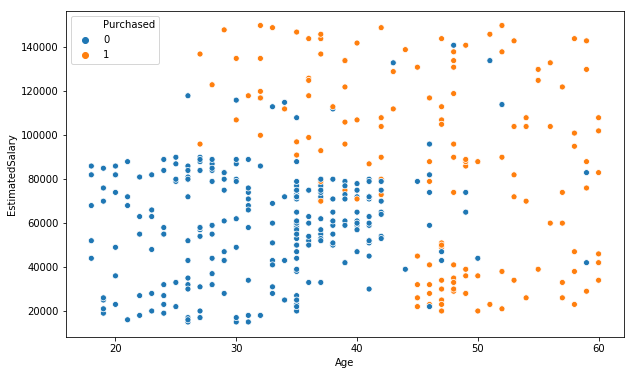

In [132]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Purchased"])

##### Trainig,Testing,Splitting
##### Test ,Train size refers to the how much data is used for the test and the train
##### random state takes data randomly if we gaiven any number like 10, 20 or if you give  0 it will take data in sequence way

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#### Scaling every data point in the dataset ,ranges from(0to1)

In [124]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

##### for this data here i am using knn classifier

In [133]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [134]:
y_predict=model.predict(X_test)
y_test=np.array(y_test)

##### accuracy of our model

In [139]:
c=0
for i in range(len(y_predict)):
    if y_test[i] ==y_predict[i]:
        c=c+1
print(c)
print("accuracy:",c*100/len(y_test))

110
accuracy: 91.66666666666667


In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9166666666666666

#### plotting a graph on y_test based on age and estimatedsalary

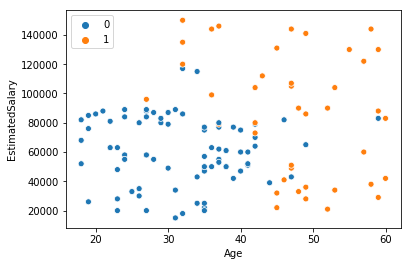

In [136]:
sns.scatterplot(x=x_test["Age"],y=x_test["EstimatedSalary"],hue=y_test)

#### plotting a graph on y_predict based on age and esitmatedsalary


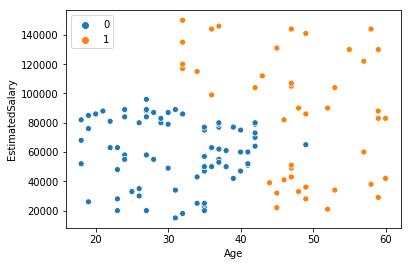

In [129]:
sns.scatterplot(x=x_test["Age"],y=x_test["EstimatedSalary"],hue=y_predict)

#### Confusion matrix of our model

In [140]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

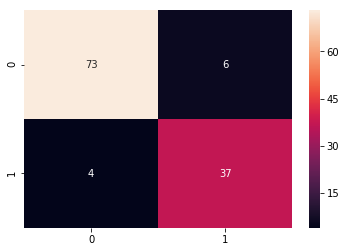

In [141]:
sns.heatmap(cm,annot=True)